In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Installing & Importing Libraries

In [ ]:
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Data Structures
import numpy  as np
import pandas as pd
import geopandas as gpd
import json

# Corpus Processing
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sb
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

# Map Viz
import folium
#import branca.colormap as cm
from branca.element import Figure

## Loading Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/National Anthems/anthems.csv', encoding='utf-8')
data

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,O defenders of the Homeland! Rally around to t...
186,Uganda,UG,UGA,Africa,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,Western Sahara,EH,ESH,Africa,"O sons of the Sahara! In the battlefield, you ..."
188,Zambia,ZM,ZMB,Africa,"Stand and sing of Zambia, proud and free, Land..."


In [ ]:
# converting the column names into lowercase

data.columns = map(str.lower, data.columns)
data.head(10)

,country,alpha-2,alpha-3,continent,anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."
5,Belgium,BE,BEL,Europe,"O dear Belgium, O holy land of the fathers Ã¢â..."
6,Bosnia and Herzegovina,BA,BIH,Europe,You're the light of the soul Eternal fire's fl...
7,Bulgaria,BG,BGR,Europe,"Proud Balkan Mountains, next to it the Danube ..."
8,Croatia,HR,HRV,Europe,"Our beautiful homeland, Oh so fearless and gra..."
9,Cyprus,CY,CYP,Europe,"We knew thee of old, O, divinely restored, By ..."


## Data Processing

In [ ]:
# convert the elements of the array into a list

anthem = data['anthem'].tolist()
anthem[57][:]

'O Canada! Our home and native land! True patriot love thou dost in us command. We see thee rising fair, dear land, The True North, strong and free; And stand on guard, O Canada, We stand on guard for thee. O Canada! O Canada! O Canada! We stand on guard for thee, O Canada! We stand on guard for thee. O Canada! Where pines and maples grow, Great prairies spread and lordly rivers flow, How dear to us thy broad domain, From East to Western sea! Thou land of hope for all who toil! Thou True North, strong and free! O Canada! O Canada! O Canada! We stand on guard for thee, O Canada! We stand on guard for thee. O Canada! Beneath thy shining skies May stalwart sons and gentle maidens rise, To keep thee steadfast through the years From East to Western sea, Our own beloved native land, Our True North, strong and free! O Canada! O Canada! O Canada! We stand on guard for thee, O Canada! We stand on guard for thee. Ruler Supreme, Who hearest humble prayer, Hold our dominion within Thy loving care.

In [ ]:
# convert data into lowercase

for i in range(len(anthem)):
    anthem[i] = anthem[i].lower()
anthem[47][:]

"beloved homeland, receive the vows that chile gave you on your altars that you be either the tomb of the free or a refuge from oppression the bloody fight has ceased; and yesterday's invader is now our brother; three centuries we washed the affront fighting in the field of honor. that who yesterday was a slave is free and triumphant today; freedom is the heritage of the brave, victory lies shameful to his feet. rise, chile, with a spotless forehead; you conquered your name on the fight; always noble, constant and courageous the children of the cid found you. may your free calmly crown the arts, industry and peace, and may they sing songs of your triumph to intimidate the daring despot. your names, brave soldiers who have been chile's mainstay, they are engraved in our chests; our children will know them as well. may they be the death cry that comes out when we march to the fight, and ringing in the mouth of the strong they always make the tyrant tremble. if the foreign cannon intends 

## Noise Removal
Removing any punctuation, unwanted ascii symbols, etc

In [ ]:
for i in range(len(anthem)):
  anthem[i] = anthem[i].translate(str.maketrans('', '', string.punctuation))
  anthem[i] = re.sub('\W_',' ', anthem[i])        # removes specials characters and leaves only words
  anthem[i] = re.sub("\S*\d\S*"," ", anthem[i])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
  anthem[i] = re.sub("\S*@\S*\s?"," ", anthem[i]) # removes emails and mentions (words with @)
  anthem[i] = re.sub(r'http\S+', '', anthem[i])   # removes URLs with http
  anthem[i] = re.sub(r'www\S+', '', anthem[i])    # removes URLs with www
  anthem[i] = re.sub(r'ã\S+', '', anthem[i])
anthem[18]

'o lord bless the nation of hungary with your grace and bounty extend over it your guarding arm during strife with its enemies long torn by ill fate bring upon it a time of relief this nation has suffered for all sins of the past and of the future you brought our ancestors up over the carpathians holy peaks by you was won a beautiful homeland for bendeguzs sons and wherever flow the rivers of the tisza and the danube  our heros descendants will root and bloom for us on the plains of the kuns you ripened the wheat in the grape fields of tokaj you dripped sweet nectar our flag you often planted on the wild turks earthworks and under m grave army whimpered viennas proud fort ah but for our sins anger gathered in your bosom and you struck with your lightning from your thundering clouds now the plundering mongols arrows you swarmed over us then the turks slave yoke we took upon our shoulders how often came from the mouths of osmans barbarian nation over the corpses of our defeated army a vi

## Tokenization and Stop Words

In [ ]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [ ]:
def processAnthem(anthem, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    countries_list = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Colab Notebooks/Datasets/National Anthems/countries.txt')]         # Load .txt file line by line
    nationalities_list = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Colab Notebooks/Datasets/National Anthems/nationalities.txt')] # Load .txt file line by line
    other_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Colab Notebooks/Datasets/National Anthems/stopwords_scrapmaker.txt')] # Load .txt file line by line
    
    for document in anthem:
      i = anthem.index(document)

      listOfTokens = word_tokenize(anthem[i])
      twoLetterWord = twoLetters(listOfTokens)

      listOfTokens = removeWords(listOfTokens, stopwords)
      listOfTokens = removeWords(listOfTokens, twoLetterWord)
      listOfTokens = removeWords(listOfTokens, countries_list)
      listOfTokens = removeWords(listOfTokens, nationalities_list)
      listOfTokens = removeWords(listOfTokens, other_words)
        
      listOfTokens = applyStemming(listOfTokens, param_stemmer)
      listOfTokens = removeWords(listOfTokens, other_words)

      anthem[i]   = " ".join(listOfTokens)
      anthem[i] = unidecode(anthem[i])

    return anthem

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
language = 'english'
anthem = processAnthem(anthem, language)
anthem[18][0:460]

'lord bless nation hungari grace bounti extend guard arm strife enemi long torn ill fate bring upon time relief nation suffer sin past futur brought ancestor carpathian holi peak beauti homeland bendeguz son wherev flow river tisza danub hero descend root bloom plain kun ripen wheat grape field tokaj drip sweet nectar flag often plant wild turk earthwork grave armi whimper vienna proud fort sin anger gather bosom struck lightn thunder cloud plunder mongol a'

## Statistical Weighting of Words
Feature Extraction with TF-IDF

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(anthem)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

190 rows


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
albania,0.309839,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
sacr,0.281065,0.00000,0.000000,0.000000,0.08923,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
fatherland,0.227894,0.11072,0.073134,0.146818,0.00000,0.089323,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
proclaim,0.220137,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104129
upon,0.197538,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093440


In [ ]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
albania,0.309839,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
sacr,0.281065,0.00000,0.000000,0.000000,0.08923,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
fatherland,0.227894,0.11072,0.073134,0.146818,0.00000,0.089323,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
proclaim,0.220137,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104129
upon,0.197538,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093440


## K-Means Algorithm

In [ ]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

## Silhouette Score


In [ ]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [ ]:
# Running Kmeans
k = 8
kmeans_results = run_KMeans(k, final_df)

# Plotting Silhouette Analysis
#silhouette(kmeans_results, final_df, plot=True)

## Cluster Analysis

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sb.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


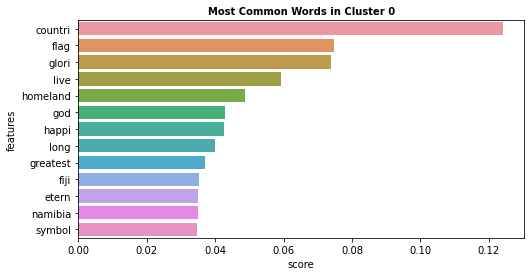

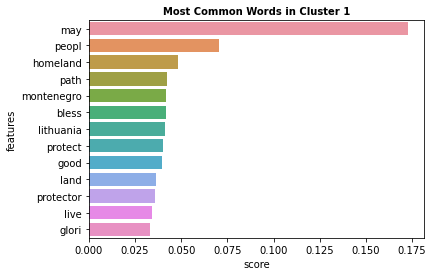

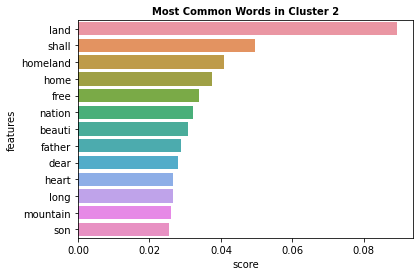

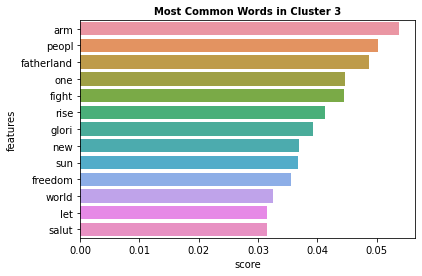

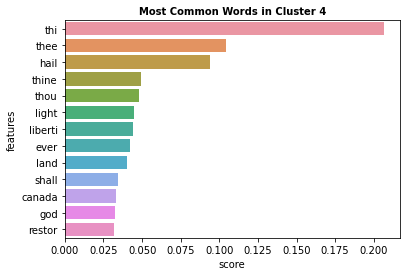

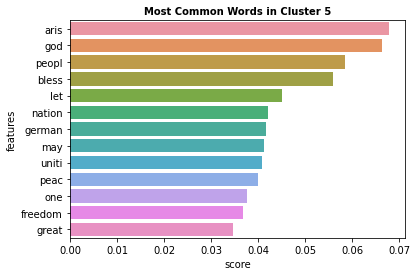

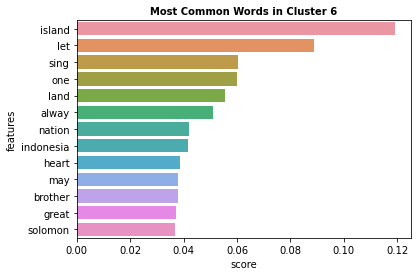

In [ ]:
best_result = 7
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

## Word Cloud

In [ ]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

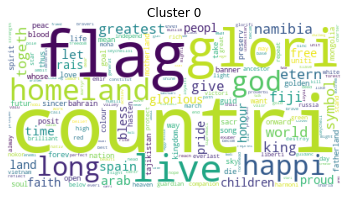

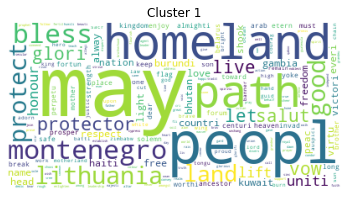

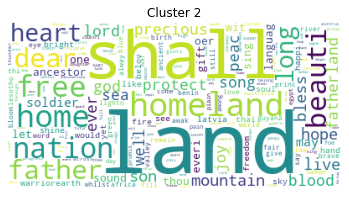

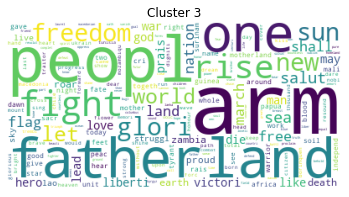

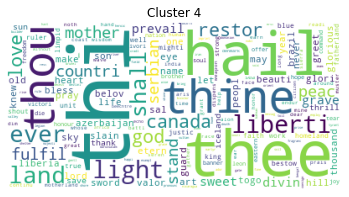

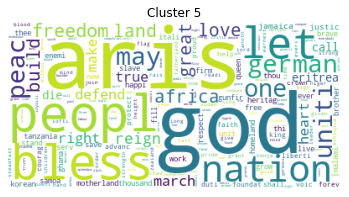

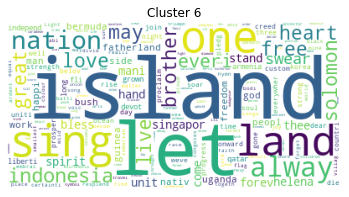

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [ ]:
# Assigning the cluster labels to each country
labels = kmeans.labels_ 
data['label'] = labels
data.head()

,country,alpha-2,alpha-3,continent,anthem,label
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",3
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",6
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",2
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",4
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",1


In [ ]:
# Map Viz
import json
import geopandas as gpd

# Loading countries polygons
geo_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/National Anthems/world-countries.json'
country_geo = json.load(open(geo_path))
gpf = gpd.read_file(geo_path)

# Merging on the alpha-3 country codes
merge = pd.merge(gpf, data, left_on='id', right_on='alpha-3')
data_to_plot = merge[["id", "name", "label", "geometry"]]

data_to_plot.head(3)

,id,name,label,geometry
0,AFG,Afghanistan,2,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,3,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,3,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."


In [ ]:
import branca.colormap as cm

# Creating a discrete color map
values = data_to_plot[['label']].to_numpy()
color_step = cm.StepColormap([(255,0,0),(255,255,0),(0,255,0),(0,0,255), (255,0,255), (0,255,255), (128,128,0)], vmin=values.min(), vmax=values.max(), caption='step')

color_step

In [ ]:
import folium
from branca.element import Figure

def make_geojson_choropleth(display, data, colors):
    '''creates geojson choropleth map using a colormap, with tooltip for country names and groups'''
    group_dict = data.set_index('id')['label'] # Dictionary of Countries IDs and Clusters
    tooltip = folium.features.GeoJsonTooltip(["name", "label"], aliases=display, labels=True)
    return folium.GeoJson(data[["id", "name","label","geometry"]],
                          style_function = lambda feature: {
                               'fillColor': colors(group_dict[feature['properties']['id']]),
                               #'fillColor': test(feature),
                               'color':'black',
                               'weight':0.5
                               },
                          highlight_function = lambda x: {'weight':2, 'color':'black'},
                          smooth_factor=2.0,
                          tooltip = tooltip)

# Makes map appear inline on notebook
def display(m, width, height):
    """Takes a folium instance and embed HTML."""
    fig = Figure(width=width, height=height)
    fig.add_child(m)
    #return fig

In [ ]:
# Initializing our Folium Map
m = folium.Map(location=[43.5775, -10.106111], zoom_start=2.3, tiles='cartodbpositron')

# Making a choropleth map with geojson
geojson_choropleth = make_geojson_choropleth(["Country:", "Group:"], data_to_plot, color_step)
geojson_choropleth.add_to(m)

width, height = 1300, 675
display(m, width, height)
m